# 4.Subway EDA

## 4.1 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
subway_df = pd.read_csv('./data/subway_cleaned.csv')

## 4.2 Overview

In [3]:
subway_df.head()

,exact_date,exact_time,day_of_week,station,code,delay_min,gap_min,bound,line,vehicle,year,month,day,hour,min,at_station,line_simp,delay_type
0,2014-01-01,10:25:00 AM,Wednesday,COXWELL STATION,MUTO,5,11,W,BD,5315,2014,1,1,10,25,1,BD,short
1,2014-01-01,10:52:00 AM,Wednesday,ST CLAIR WEST STATION,MUSC,0,0,N,YU,5362,2014,1,1,10,52,1,YU,on time
2,2014-01-01,11:04:00 AM,Wednesday,NORTH YORK CENTRE STATION,SUEAS,9,14,S,YU,5411,2014,1,1,11,4,1,YU,short
3,2014-01-01,11:20:00 AM,Wednesday,DUFFERIN STATION,MUIR,7,12,W,BD,5015,2014,1,1,11,20,1,BD,short
4,2014-01-01,11:22:00 PM,Wednesday,VICTORIA PARK STATION,SUAP,0,0,NaN,BD,0,2014,1,1,23,22,1,BD,on time


In [4]:
print("There's %s records of incident and %s columns in the subway dataset."%(subway_df.shape[0],subway_df.shape[1]))

There's 128626 records of incident and 18 columns in the subway dataset.


In [5]:
print('This subway dataset starts from %s to %s.'%(subway_df.iloc[0]['exact_date'],subway_df.iloc[-1]['exact_date']))

This subway dataset starts from 2014-01-01 to 2020-06-30.


## 4.3 Check Missing values

In [6]:
missing_vals_subway = (subway_df.isnull().sum() / subway_df.shape[0]) * 100 
missing_vals_subway[missing_vals_subway > 0].sort_values(ascending=False)

bound        21.658141
line_simp     0.419044
line          0.338190
code          0.000777
dtype: float64

In [7]:
# they are not recorded
#it would be difficult to guess what bound or line the subway is heading because it could go either way.
subway_df.fillna('Unknown',inplace=True)

### Insights
- There's about 22% of the bound data missing.

In [8]:
subway_df.columns

Index(['exact_date', 'exact_time', 'day_of_week', 'station', 'code',
       'delay_min', 'gap_min', 'bound', 'line', 'vehicle', 'year', 'month',
       'day', 'hour', 'min', 'at_station', 'line_simp', 'delay_type'],
      dtype='object')

## 4.4 Analyzing Continuous Variables (using distribution graphs, boxplots, quantiles and correlation matrix)

Continuous variables are: exact date, exact time, year, month, day, hour, minute, delay_min, gap_min, vehicle

### 4.4.1 Delay by Date Counts

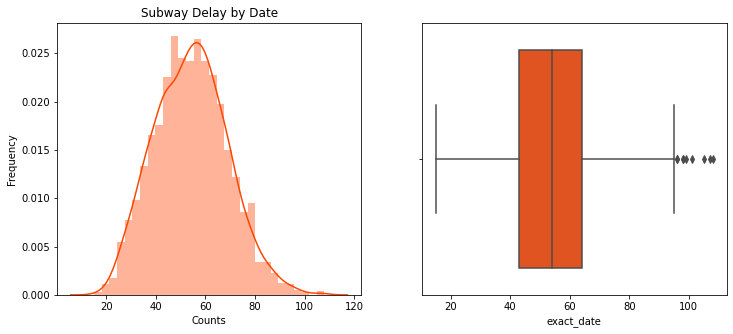

In [9]:
subway_date_counts = subway_df.exact_date.value_counts()
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.distplot(subway_date_counts, ax=ax[0], color="orangered", kde=True);
ax[0].set_xlabel("Counts")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Subway Delay by Date");

sns.boxplot(subway_date_counts, ax=ax[1], color="orangered");

In [10]:
# a function to find quantiles, or where most data are.
def compute_quantiles(col_counts):
    Q1 =  np.quantile(col_counts, 0.25)
    Q3 =  np.quantile(col_counts, 0.75)
    IQR = Q3 - Q1
    print('Most data are within %d to %d.'%(Q1,Q3))
    print('Median is', np.quantile(col_counts, 0.5))
    print('The data are usually below %d.'%np.quantile(col_counts, 0.95))
    
    lower_fence = Q1 - 1.5 * (IQR)
    upper_fence = Q3  + 1.5 * (IQR)
    outlier = col_counts[col_counts < lower_fence].sum() + col_counts[col_counts > upper_fence].sum()
    print('Anything above %d and below %d is an outlier.'%(upper_fence,lower_fence))
    print("There are %d outliers." %outlier)
    print('Most occurence is %d of %s.' %(col_counts.max(), col_counts.index[0]))

In [11]:
compute_quantiles(subway_date_counts)

Most data are within 43 to 64.
Median is 54.0
The data are usually below 79.
Anything above 95 and below 11 is an outlier.
There are 908 outliers.
Most occurence is 108 of 2019-02-27.


### Insights
- Most dates have range from roughly 38 to 57 delays.
- More than 70 delays per day is very seldom.
- The most delay per day happened on 2014-02-05 with 100 delays.
- There are 900 outliers.

### 4.4.2 Delay by Exact Time Counts

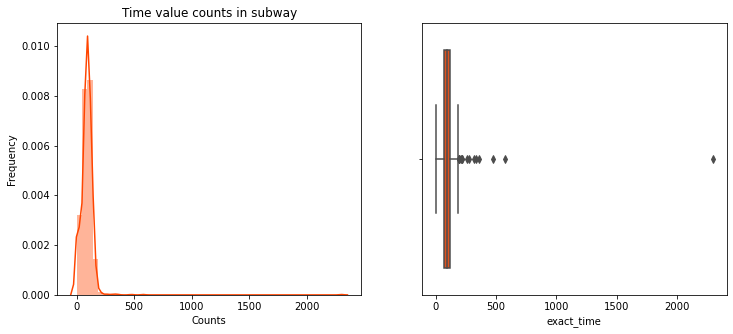

In [12]:
subway_time_counts = subway_df.exact_time.value_counts()
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.distplot(subway_time_counts, ax=ax[0], color="orangered", kde=True);
ax[0].set_xlabel("Counts")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Time value counts in subway");

sns.boxplot(subway_time_counts, ax=ax[1], color="orangered");

In [13]:
compute_quantiles(subway_time_counts)

Most data are within 67 to 114.
Median is 91.0
The data are usually below 147.
Anything above 184 and below -3 is an outlier.
There are 6301 outliers.
Most occurence is 2299 of 10:00:00 PM.


### Insights
- A heavily right skewed distribution shown above, it shows thatcertain period is prone to have more delays than the others. 
- There's an extreme outlier with 2294 delays at 10PM.
- Most of the time we have 59 to roughly 100 delays.

### 4.4.3 More on continuous variables

In [14]:
subway_df.columns

Index(['exact_date', 'exact_time', 'day_of_week', 'station', 'code',
       'delay_min', 'gap_min', 'bound', 'line', 'vehicle', 'year', 'month',
       'day', 'hour', 'min', 'at_station', 'line_simp', 'delay_type'],
      dtype='object')

In [15]:
# initialize continuous variables
subway_cont = subway_df[['year','month','day','hour','min','delay_min','gap_min','vehicle']]

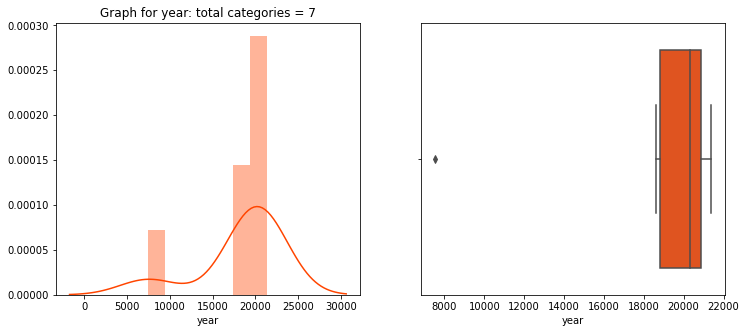

Most data are within 18818 to 20872.
Median is 20338.0
The data are usually below 21308.
Anything above 23953 and below 15737 is an outlier.
There are 7514 outliers.
Most occurence is 21394 of 2015.




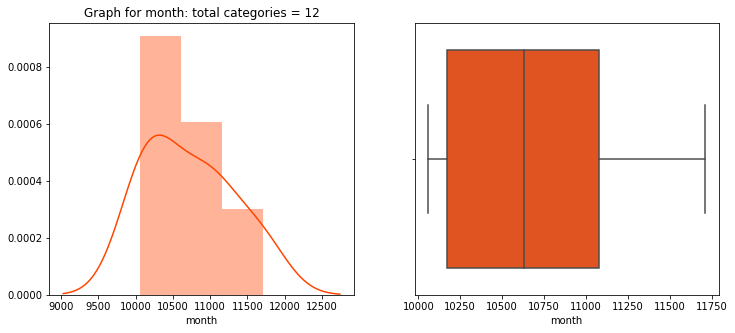

Most data are within 10169 to 11077.
Median is 10632.0
The data are usually below 11672.
Anything above 12438 and below 8808 is an outlier.
There are 0 outliers.
Most occurence is 11709 of 3.




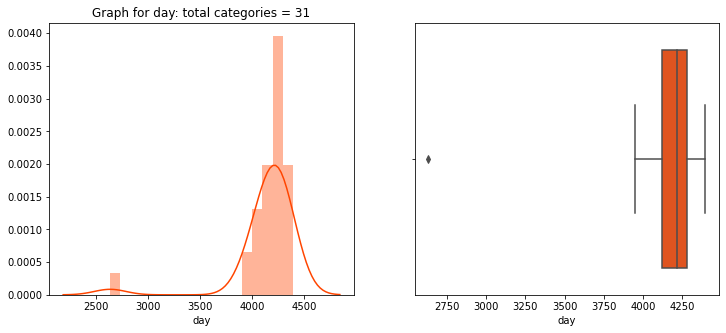

Most data are within 4117 to 4278.
Median is 4213.0
The data are usually below 4365.
Anything above 4520 and below 3874 is an outlier.
There are 2634 outliers.
Most occurence is 4394 of 11.




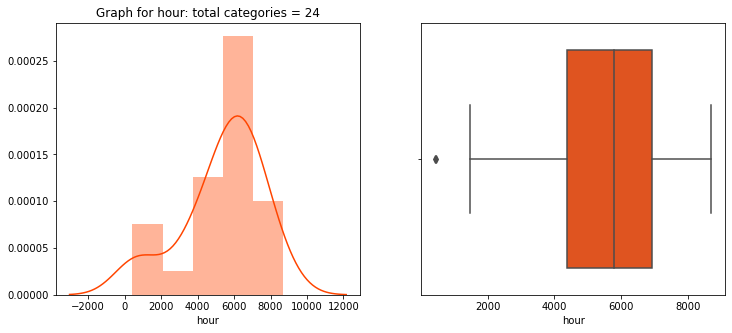

Most data are within 4393 to 6911.
Median is 5784.5
The data are usually below 8052.
Anything above 10688 and below 616 is an outlier.
There are 878 outliers.
Most occurence is 8708 of 8.




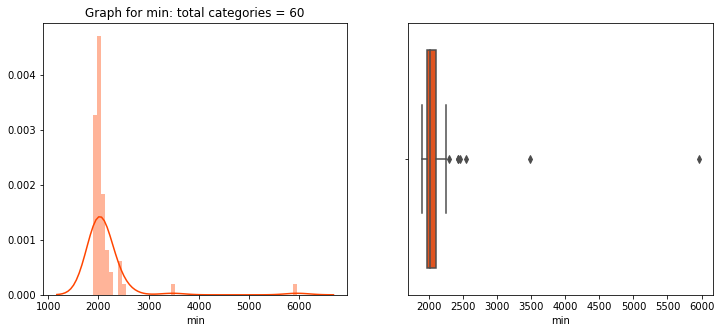

Most data are within 1973 to 2097.
Median is 2017.0
The data are usually below 2448.
Anything above 2284 and below 1786 is an outlier.
There are 21549 outliers.
Most occurence is 5959 of 0.




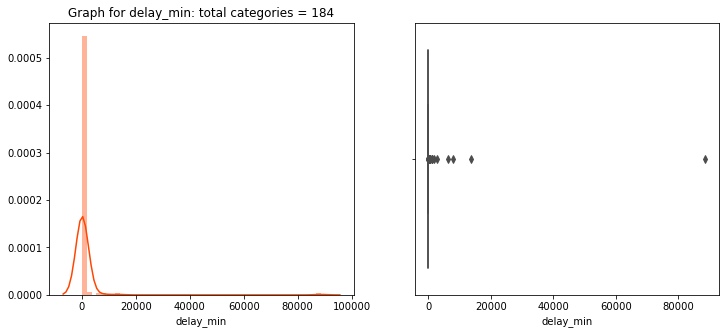

Most data are within 1 to 9.
Median is 2.0
The data are usually below 560.
Anything above 21 and below -11 is an outlier.
There are 128109 outliers.
Most occurence is 88596 of 0.




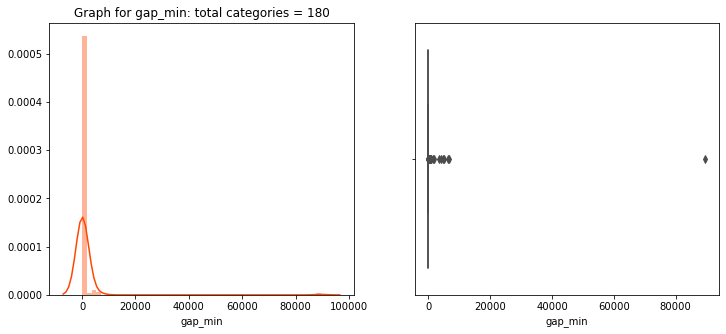

Most data are within 1 to 11.
Median is 3.0
The data are usually below 992.
Anything above 26 and below -14 is an outlier.
There are 128070 outliers.
Most occurence is 89491 of 0.




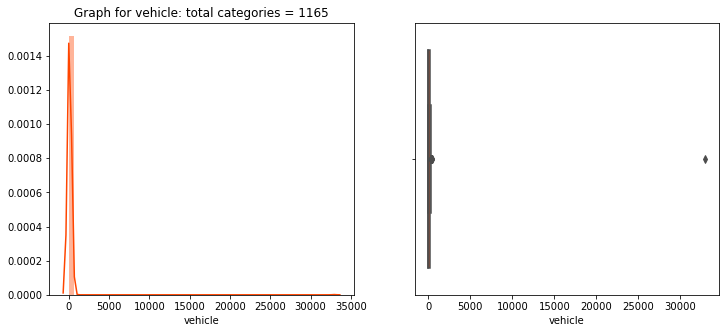

Most data are within 1 to 139.
Median is 5.0
The data are usually below 298.
Anything above 346 and below -206 is an outlier.
There are 36935 outliers.
Most occurence is 32934 of 0.




In [16]:
# Using a for loop to plot each continous variables and compute quantiles.
for col in subway_cont.columns:
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    cont_num = subway_cont[col].value_counts()
    chart = sns.distplot(cont_num, ax=ax[0], color="orangered", kde=True)
    ax[0].set_title("Graph for %s: total categories = %d" %(col, len(cont_num)))
    sns.boxplot(cont_num, ax=ax[1], color="orangered")
    plt.show()

    compute_quantiles(cont_num)
    print('\n')

### Insights

The graphs that are more skewed show that:
- 2015 has the most number of delays with 19000 in total.
- Out of all days, day 10 has the most records of delay, 7464.
- most delays are recorded at exactly 0 minute of the hour. 
- most delays are 0 minutes long with 78306 occurences.
- most gaps are 0 mins long with 79085 occurences.

The relatively normal distributed graphs are: (hour vs time)?
- March with 10300 tops to be the month of most occurence delays.

### 4.4.4 Correlation Matrix

<AxesSubplot:>

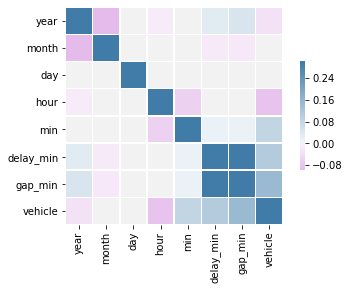

In [17]:
# check correlations between continuous variables
cmap = sns.diverging_palette(660, 600, as_cmap=True);
sns.heatmap(subway_cont.corr(), vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Insights:
- Similar to the bus dataset, delays and gaps are positive correlated.
- Anything other than delays and gaps have no correlations.

## 4.5 Analyzing Categorical Variables (using bar graphs)

In [18]:
# dataframe for categorical variables
subway_cat = subway_df[['year','month','day','hour','day_of_week','bound', 'at_station', 'line_simp','delay_type']]

### 4.5.1 Bar Graphs

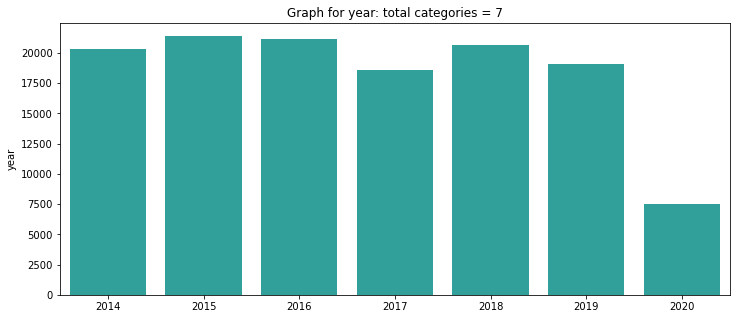

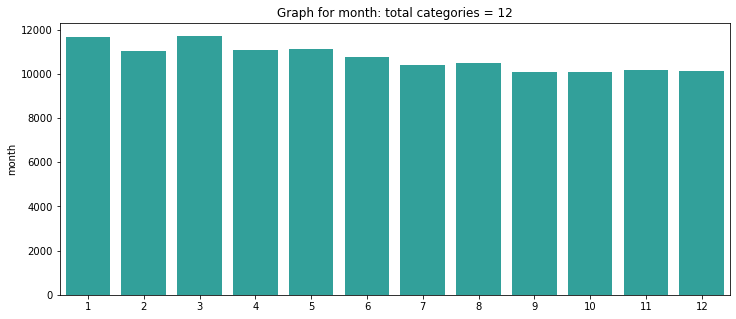

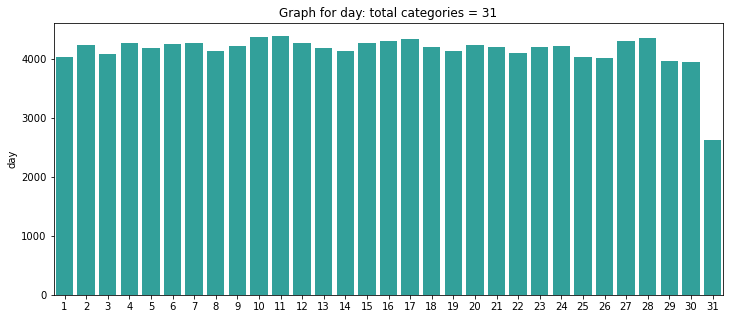

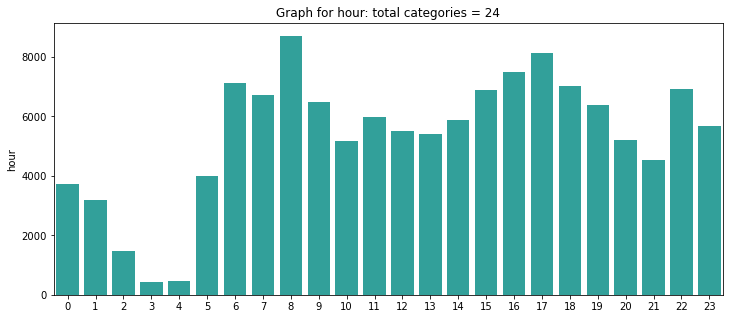

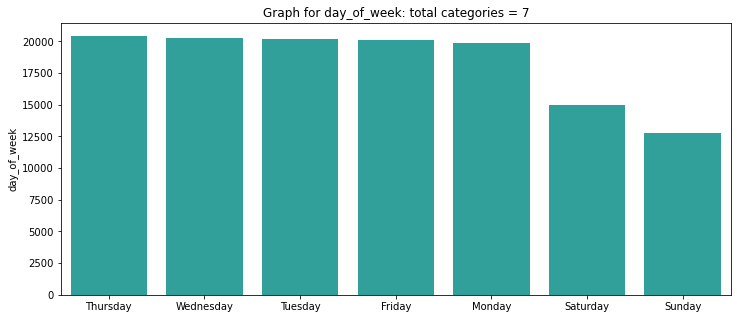

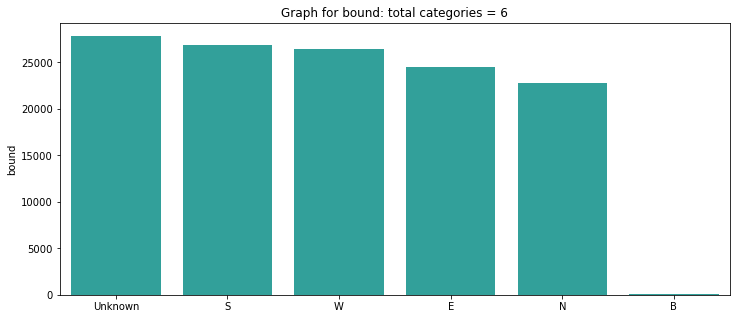

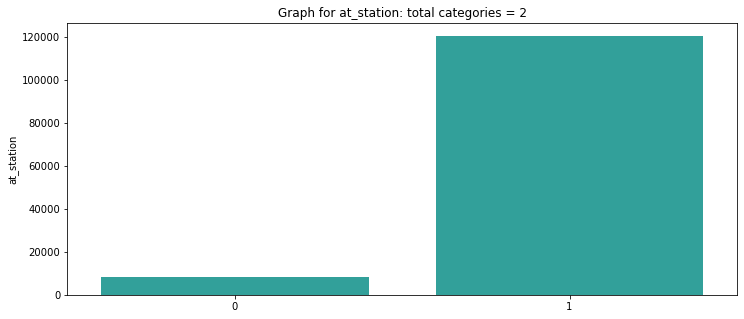

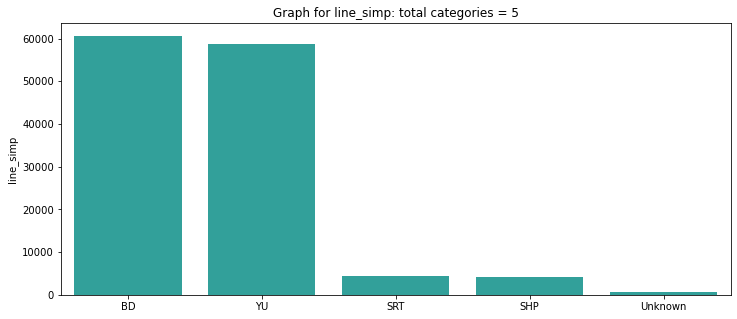

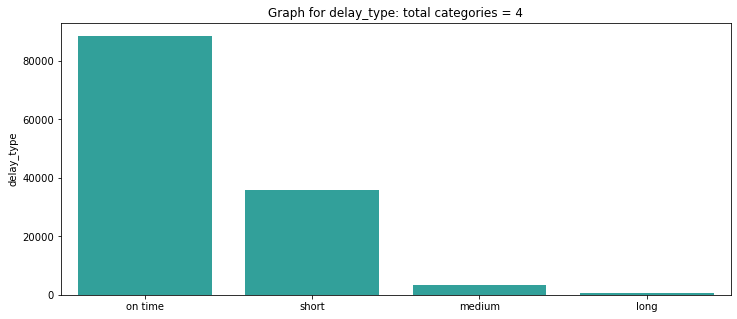

In [19]:
# Inspired by Ken Jee
# Using a for loop to plot each categorical variable.
for col in subway_cat.columns:
    plt.figure(figsize=(12,5))
    cat_num = subway_cat[col].value_counts()
    plt.title("Graph for %s: total categories = %d" %(col, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num,color="lightseagreen")
    #chart.set_xticklabels(chart.get_xticklabels(), rotation=20, horizontalalignment='right')
    plt.show()

### Insights
Graph for year:
- 2015 to 2019 are pretty even in this case.
- Although 2020 has the least number of delay recorded, keep in mind that we only have 6 months of data from 2020 and there's a pandemic in this year.

Graph for month:
- January and March both peaked of this graph.

Graph for day:
- We observe that day 10, 28 and 29 peak in this graph meaning that delays are more likely to happen in the middle and end of the month.

Graph of hour:
- 8 AM have the most recorded delays. 3AM to 4 AM have the least record of delays.

Graph for day:
- We observe that the weekdays have almost twice more delays than weekends.
- The weekdays are pretty even.

Graph for bound:
- More subway trains are likely to be delayed going west followed by east, south and north.
- Subway trains going both ways are not as likely to be delayed as there are not many trains operate on heading both ways.

Graph for at_station:
- Most trains are delay at a station.

Graph for line:
- Most delays occured at the Bloor-Danforth line followed by Yonge-University
- Sheppard line and Scarborough line both have the least number of delays.

Graph for delay type:
- We observe that most trains were actually on time, meaning there was an incident recorded but the incident was quickly fixed and no delay caused by it.
- Short delays have about 30000 records.
- Medium to long delays are really seldom in this case.

## 4.6 Top 10's (Using Countplot)

### 4.6.1 Top 10 Delay Code

There are roughly 200 different delay codes for subway trains. So, we are only going to look at the top 10 delay code.

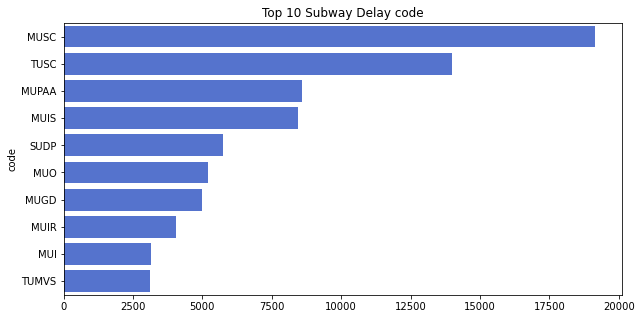

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(y=subway_df.code, order= subway_df.code.value_counts().iloc[:10].index, color="royalblue")
plt.title("Top 10 Subway Delay code")
plt.xlabel('');

Read more about subway delay: [ttc-subway-delay-codes](https://open.toronto.ca/dataset/ttc-subway-delay-data/)

According to TTC subway delay code description:
- MUSC: Miscellaneous Speed Control
- TUSC: Operator Overspeeding
- MUIS: Injured or ill Customer (In Station) - Transported
- MUPAA: Passenger Assistance Alarm Activated - No Trouble Found
- SUDP: Disorderly Patron
- MUO: Miscellaneous Other
- MUGD: Miscellaneous General Delays
- MUIR: Injured or ill Customer (On Train) - Medical Aid Refused
- MUI: Injured or ill Customer (On Train) - Transported
- TUMVS: Operator Violated Signal


### 4.6.2 Top 10 delay by Subway Station (REWORK)

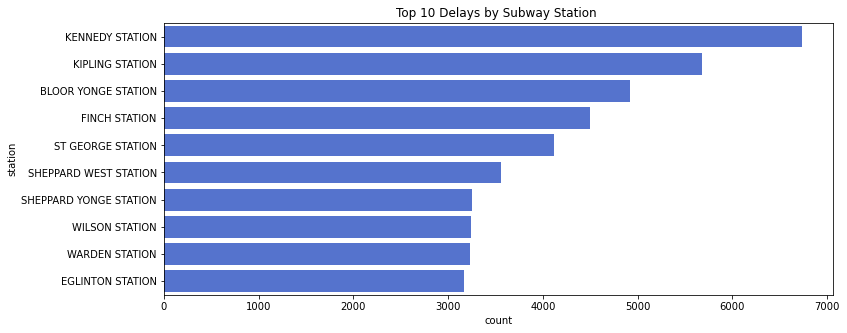

In [21]:
# only plotting stations
only_station = subway_df[subway_df.station.str.contains('STATION', regex=True)]

plt.figure(figsize=(12,5))
sns.countplot(y=only_station.station, order= only_station.station.value_counts().iloc[:10].index, color="royalblue");
plt.title("Top 10 Delays by Subway Station ");

### Insights:
    - 6 of the stations on this list are either a terminal station or a interchange station.

## 4.7 Comparing delay vs others (using bar graphs)

### 4.7.1 Delays vs Day of the Week

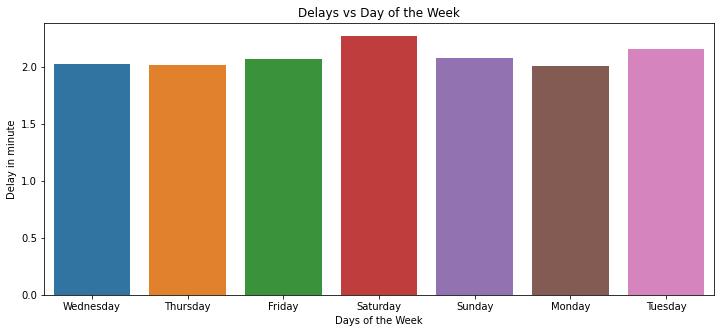

In [22]:
plt.figure(figsize=(12,5));
sns.barplot(x='day_of_week', y='delay_min', data= subway_df, ci=None);
plt.title("Delays vs Day of the Week");
plt.xlabel("Days of the Week");
plt.ylabel("Delay in minute");

### Insights
- Saturdays have the longest delay time while having the second least delay record.

### 4.7.2 Delays vs Hour

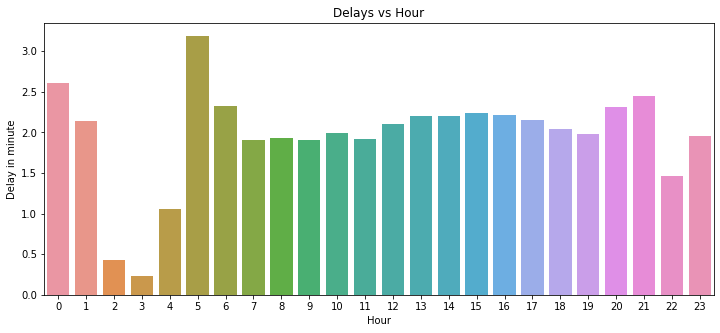

In [23]:
plt.figure(figsize=(12,5))
sns.barplot(x='hour', y='delay_min', data= subway_df, ci=None);
plt.title("Delays vs Hour")
plt.xlabel("Hour")
plt.ylabel("Delay in minute");

### Insights
- During rush hours the delays are roughly 2 minutes long
- Some of the longer delays happened at 12 AM and 5 AM

### 4.7.3 Delays vs Subway Bound

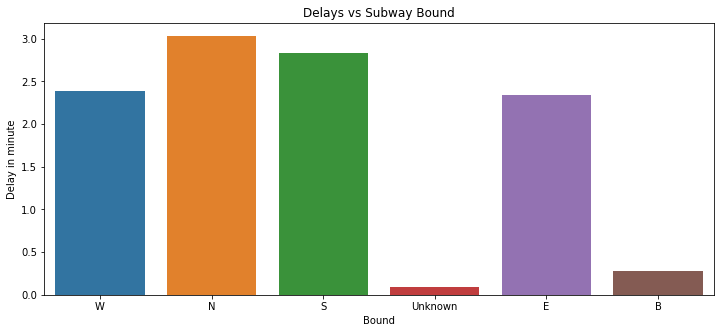

In [24]:
plt.figure(figsize=(12,5))
sns.barplot(x='bound', y='delay_min', data= subway_df, ci=None);
plt.title("Delays vs Subway Bound")
plt.xlabel("Bound")
plt.ylabel("Delay in minute");

### 4.7.4 Delays vs Subway Lines

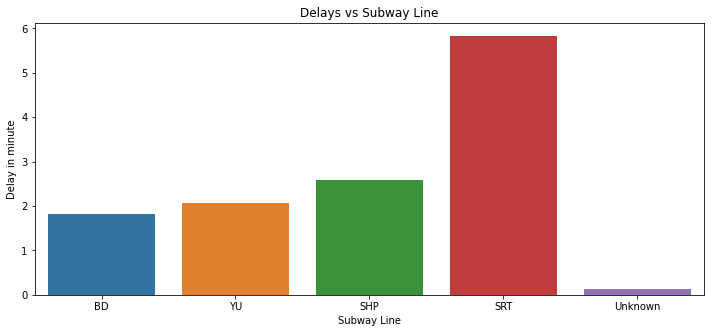

In [25]:
plt.figure(figsize=(12,5))
sns.barplot(x='line_simp', y='delay_min', data= subway_df, ci=None);
plt.title("Delays vs Subway Line")
plt.xlabel("Subway Line")
plt.ylabel("Delay in minute");

### Insights
- The SRT line having the longest delay time whilst having the least delay record.

### 4.7.5 Delays by Days of the Week and Subway Lines

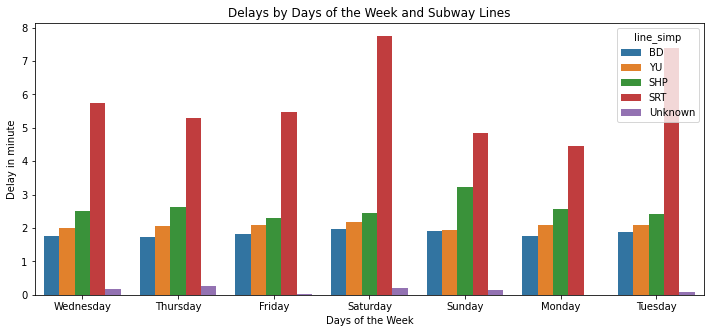

In [26]:
plt.figure(figsize=(12,5))
sns.barplot(x=subway_df.day_of_week, y=subway_df.delay_min,hue=subway_df.line_simp, ci=None);
plt.title("Delays by Days of the Week and Subway Lines")
plt.xlabel("Days of the Week")
plt.ylabel("Delay in minute");

### Insights:
- Line 3 Scarborough has the longest delay time on average for each day and it could go up to 8 mins.
- Line 1 Yonge-University and line 2 Bloor-Danforth have the most delay record but at the same time they don't have the longest delay time.

## 4.8 Using WordCloud to visualize the most recorded Station

In [27]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [28]:
# Remove the word station in the station column
only_station.station = only_station.station.str.replace('STATION', '')

c:\users\jason\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


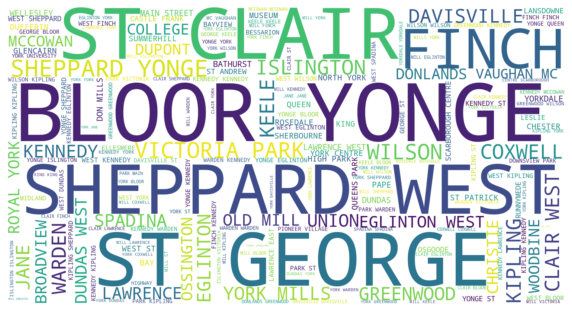

In [29]:
# Only look at station
words = " ".join(only_station['station'])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1500, height = 800)
wc.generate(words)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

## Prepare data for tableau analysis

In [30]:
only_station.groupby(by=["station"]).count().sort_values('station', ascending=True)

,exact_date,exact_time,day_of_week,code,delay_min,gap_min,bound,line,vehicle,year,month,day,hour,min,at_station,line_simp,delay_type
station,,,,,,,,,,,,,,,,,
BATHURST,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127
BAY,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894
BAYVIEW,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498
BESSARION,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325
BLOOR YONGE,4917,4917,4917,4917,4917,4917,4917,4917,4917,4917,4917,4917,4917,4917,4917,4917,4917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WILSON,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552
WOODBINE,1270,1270,1270,1270,1270,1270,1270,1270,1270,1270,1270,1270,1270,1270,1270,1270,1270
YORK MILLS,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866


In [31]:
def trim(dataset):
    # using .strip() to remove the leading and the trailing white spaces in each cell
    trim = lambda x: x.strip() if type(x) is str else x
    return dataset.applymap(trim)

only_station = trim(only_station)

In [32]:
only_station.to_csv('./data/subway_station_cleaned.csv',index=False)